We've worked with vectors, matrices, and lists as we calculated final grades, ranked universities, and organized club data. In this file, we'll analyze data on college (university) majors (areas of study) as we learn to work with another of R's data structures: __data frames__.

Data frames are probably the most common structures we'll work with when analyzing data in R, so we'll help to build a strong foundational understanding of how to manipulate then. Like lists, data frames can contain multiple data types. Unlike lists, though, all elements of a data frame are vectors of equal length.

In this file, we'll also introduce to some R **packages** designed to make doing data science with data frames maximally efficient. In R, packages consist of user-contributed functions, code, and data that extend R's capabilities.

So far, we have learned how to program using **"base R"**, which is how we refer to the basic functions of R that are available without installing any additional packages.

In this file, we'll learn about two packages, `readr` and `dplyr`, that are part of a "family" of packages collectively referred to by the R community as ["the tidyverse"](https://www.tidyverse.org/).

### Choosing a Major

In this file, we'll identify majors that would be a good fit for us.

To understand pros and cons of various majors, we obtained data on recent graduates from [FiveThirtyEight's GitHub account](https://github.com/fivethirtyeight/data/tree/master/college-majors) and saved a subset of it to work with in this file.

Here's a description of the variables in the data set:

* `Rank`: Rank by median earnings
* `Major_code`: Major code
* `Major`: Major description
* `Total`: Total number of people with major
* `Men`: Male graduates
* `Women`: Female graduates
* `Major_category`:Category of major
* `Sample_size`: Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
* `Employed`: Number employed
* `Full_time`: Employed 35 hours or more
* `Part_time`: Employed less than 35 hours
* `Full_time_year_round`: Employed at least 50 weeks and at least 35 hours
* `Unemployed`: Number unemployed
* `Unemployment_rate`: Unemployed / (Unemployed + Employed)
* `Median`: Median earnings of full-time, year-round workers
* `College_jobs`: Number with job requiring a college degree
* `Non_college_jobs`: Number with job not requiring a college degree
* `Low_wage_jobs`: Number in low-wage service jobs

As we prepare to choose a major, we've decided on three main criteria:

1. We're interested in the physical and life sciences.
2. We'd like a decent salary. Recent graduates must have a median salary above 40,000 USD.
3. We'd like to avoid male-dominated majors. More than 40 percent of graduates must be women.

In this file, as we identify the majors that satisfy our criteria, we'll perform the following steps:

* Import the data into R as a data frame and explore it.
* Select college major data that meet our criteria.
* Create a new data frame containing data on majors to consider.

To work with the data, we'll import it into R and save it as a data frame. This is a very common first step in a data analysis workflow, and one that will probably become very familiar to us as we get more practice analyzing data.

Instead of using **base R** functions for data import, we'll learn to use a package called `readr` that contains functions for importing data of various formats into R.

The `readr` package is part of the tidyverse collection of packages. It is designed to improve the data science workflow in a few ways:

* **Speed**: Importing larger data files with `readr` functions is generally faster than using base R functions.
* **Code reproducibility**: While base R function behavior depends in part on operating system and environment variables, this is not the case for `readr`. When we use `readr` to import files, code that works on our computer will work on someone else’s.
* **Consistency**: The `readr` package shares a common syntax and design philosophy with other tidyverse packages.

To install an R package, we use the function `install.packages()`.

`install.packages("readr")`

This function installs our desired packages from the [Comprehensive R Archive Network (CRAN) repository](https://cran.r-project.org/). Note that we need to surround the package name with quotation marks.

Once we've installed packages, we won't need to do so with each new R session.
We will, however, need to load packages we want to work with when beginning a new session. To load packages, we'll use the function `library()`:

`library(readr)`

We do not need to surround package names with quotation marks to load them using the library() function.

Let's load the readr package.

**Task**

* Use the `library()` function to load the readr package

**Answer**

* library(readr)

The data set is stored in a file format called `.csv`, which stands for "comma separated value". Files in CSV format contain characters with spacing indicated by commas. If we open the file with a text editing program, the first few rows are difficult to understand:

To import the data into R in the format of a table that we can more easily read, we'll need to use a function that's appropriate for working with data stored in a CSV.

The `readr` package contains a function, `read_csv()`, that's specifically for importing data in CSV format into R. We can store the imported data as a data frame by assigning it to a variable name.

`new_data_frame <- read_csv("filename.csv")`

When we use the `read_csv()` function, R will return a message letting us know the data types it assigned to each column. This is not an error message, and not a cause for concern.

The data we'll analyze in this are stored in file called `"recent_grads.csv"`. Let's import these data into R and store them in a data frame called `recent_grads`.

**Task**

* Use the read_csv() function to import the file "recent_grads.csv" into R.

**Answer**

* recent_grads <- read_csv("recent_grads.csv")

Let's investigate the data we've imported and saved as a data frame.

Here are the first ten rows of the `recent_grads` data frame:

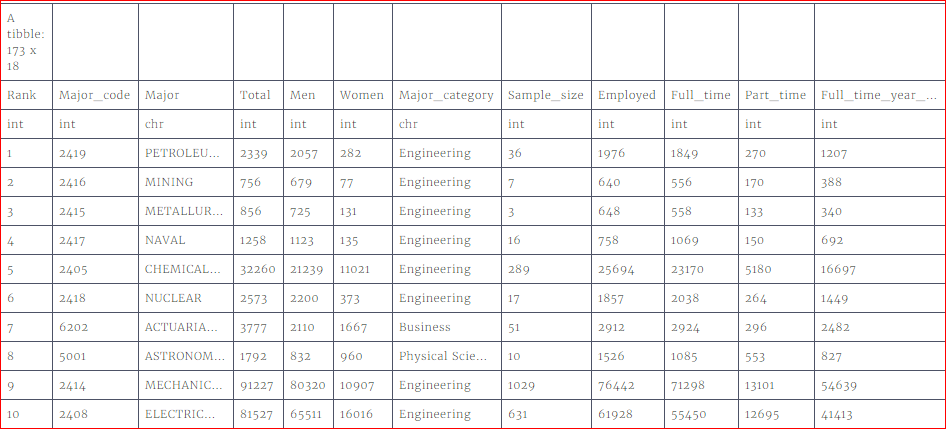

The data frame also contains additional information:

* **Data Types**: Under each column name, the type of data contained in the column is indicated as an abbreviation: `chr`, `int`, and `dbl` stand for "character", "integer", and "double".

* **Identity and Dimensions**: At the top left of the output we'll see this line: `A tibble: 173 x 18`, which tells us that we have imported and stored our data as a **tibble**, which is a specific type of data frame in R. The following numbers specify the tibble dimensions (rows x columns).

Let's talk more about [tibbles](https://cran.r-project.org/web/packages/tibble/vignettes/tibble.html). When we use the `readr` package to import our data into R, the result is a special type of data frame called a tibble. Tibbles are the same as data frames in base R in a few ways: They are two-dimensional data structures and can store data of multiple types.

We are introducing the `readr` package and tibbles because they have several important advantages for doing data science:

* **Conservative printing**: We can type the name of a tibble and R will only print the first 10 rows; this prevents accidentally wasting time as thousands of rows of data print, as can happen with base R data frames.
* **Clarity**: When we print a tibble, the data type for each column is conveniently listed alongside the name.
* **Consistency**: Unlike base R data frames, tibbles will never change the type of the inputs, the names of variables, or the row names. This will be important when we share our code with colleagues.

Since tibbles are specialized data frames, we can refer to them as `"tibbles" or "data frames"` interchangeably. We will simply refer to them as "data frames".

When we want to return a specific column, row, or value from a data frame, we can index them. The syntax for indexing data frames is very similar to the syntax we used to index matrices.

Let's say we want to return the column of the data frame containing `Major`. We can perform this operation using several techniques.

We could index the data frame by position.

`recent_grads[, 3]`

We could index by column name:

`recent_grads[, "Major"]`

We can also use the `$` symbol to specify a column:

`recent_grads$Major`

Let's say that instead of a certain column, we want to extract a row of a data frame.

To return the fifth row of the data frame, we could write:

`recent_grads[5,]`

We can also index to extract a subset of values, as we learned to do for matrices.

If we wanted to extract the fifth row of the `Major` column in the recent_grads data frame, we can write:

`recent_grads[5,3]`

We can also write the following code, which specifies the column using `$` and the row number in brackets:

`recent_grads$Major[5]`

As with matrices, we can specify multiple elements to extract from a data frame. Let's extract the first ten rows of the `Major` and `Major_category` columns.

`recent_grads[c(1:10), c("Major", "Major_category")]`

**Task**

* Extract the `Major` column of the `recent_grads` data frame and save the output in a variable named `college_majors`.

* Extract the first, third, and fifth rows of the `Unemployment_rate` column and save the output dataframe in a variable named `unemployment_subset`.

**Answer**

* college_majors <- recent_grads$Major
* unemployment_subset <- recent_grads[c(1,3,5), "Unemployment_rate"]

Now that we've imported our data into R as a data frame and learned about data frame indexing, let's continue with our goal of choosing a college major.

As a reminder, our three criteria for choosing a major are:

1. We're interested in the physical and life sciences.
2. We'd like a decent salary. Recent graduates must have a median salary above 40,000 USD.
3. We'd like to avoid male-dominated majors. More than 40 percent of graduates must be women.

When we look at the `recent_grads` data frame, we can see that each **row** contains information about a college major, and each **column** contains data about a different aspect of each college major. These different aspects, like `Major_category`, `Full_time`, and `Unemployment_rate`, are called **variables**.

Let's start by simplifying our data frame to contain only variables that are important for our analysis. We'll do this by selecting a subset of the columns.

While we could index the data frame to return a subset of columns, we'll introduce tools in a tidyverse package designed specifically for analyzing data in data frames: **`dplyr`**.

Here's the code we would write to install and load the package:

`install.packages("dplyr")
library(dplyr)`

Next, let's use the `dplyr` function `select()` to create a new data frame with only columns containing the variables we want to keep for our analysis:

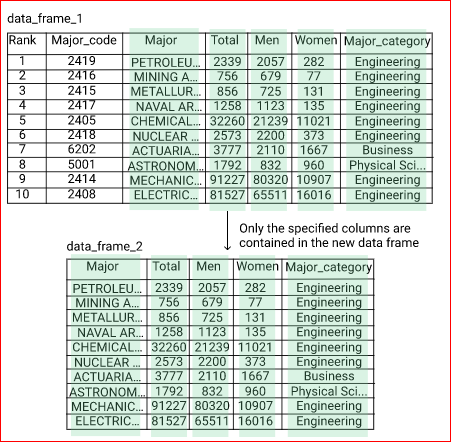

Using the `select()` function, we'll specify the data frame we want to work with and the columns we want to select.

To perform the operation depicted in the diagram, we would write the following code:

`recent_grads_select <- recent_grads %>%
    select(Major, Total, Men, Women, Major_category)`
    
Notice the `%>%` symbol, which we haven't seen before: This is called the `"the pipe operator,"` and its purpose is to help us write code that's easier to write, read, and understand. When we load packages in the tidyverse family of functions, `%>%` is loaded automatically.

The pipe lets us write code that chains series of operations together; in the case of the code above, we could read the code as, "take the `recent_grads` data frame and select the `Major`, `Total`, `Men`, `Women`, and `Major_category` columns."

Let's select the columns of our `recent_grads` data frame that will be relevent to our analysis of college majors.

**Task**

* Create a new data frame, recent_grads_select, that contains only the following variables from recent_grads:

 * Major
 * Major_category
 * Total
 * Men
 * Women
 * Median
 * Unemployment_rate
 
**Answer**
* `install.packages("dplyr")
   library(dplyr)`
* `recent_grads_select <- recent_grads %>% select(Major, Major_category, Total, Men, Women, Median, Unemployment_rate)`

Now that we've created a simplified data frame containing only variables we'll need for our analysis, let's consider whether there are any variables we need to add to our data frame to help us choose college majors based on our criteria. To make this decision, let's read through the criteria and look at the data we have available in `recent_grads_select`.

1. **We're interested in the sciences.**

The `Major_category` variable contains information about the field of study. We can use this information to identify majors in the physical and life sciences.

2. **Recent graduates must have a median salary above 40,000 USD.**

The `Median` variable provides median salaries for each major. We can use this information to identify majors with median salaries greater than 40,000 USD.

3. **More than 40 percent of graduates must be women.**

There is not a variable that tells us the percentage of graduates for each major that are women. However, we do have information about the total number of graduates (`Total`), the number of graduates who are men (`Men`), and the number of graduates who are women (`Women`).

We can create a new variable in a new column that contains the percentage of women graduates.

To create new variables and add them to our data frame as columns, we'll use a function in the `dplyr` package called `mutate()`. We can use the mutate function to create a new column based on information contained in existing columns.

Let's say we wanted to know the percentage of men graduating in each major. Since we know the total number of graduates (`Total`) and the total number of those graduates who are men (`Men`), we can write an expression to calculate the percentage of male graduates:

`(`Men` / `Total`) * 100`

How do we create a new column containing the percentage of men for each major? This is where `mutate()` comes in. The mutate function lets us specify the creation of a new column, as well as how the values contained in that new column are calculated:

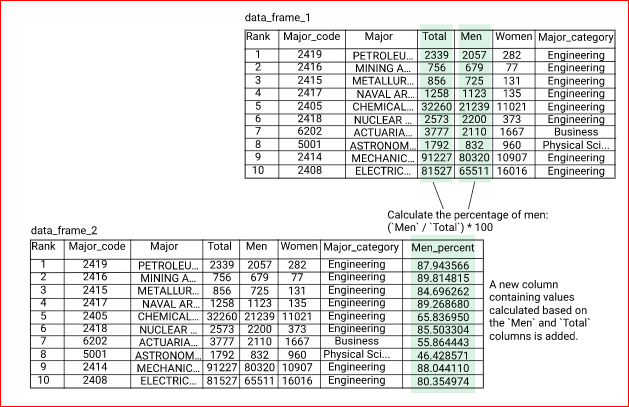

Here's the syntax for creating a data frame with a new column, Men_percent, that contains the percentage of men graduating in each major:

`data_frame_2 <- data_frame_1 %>% mutate(Men_percent = (Men/Total)*100)`

Within the `mutate()` function, we'll specify a name for our new column and then use `"="` to indicate how we want the values that fill it to be calculated.

Remember to use the pipe operator to specify the data frame we're working on and then the function we want to apply.

Now, let's change our recent_grads_select data frame so that it contains a new column with the variable Women_percent.

**Task**

* Use the `mutate()` function to create a new column (`Women_percent`) containing the percent of women graduating in each major.

**Answer**

`recent_grads_select <- recent_grads_select %>% mutate(Women_percent = (Women / Total) * 100)`

By looking through the data in the `Women_percent` column, we can see that many of the values are lower than our minimum criteria for a major's percentage of women graduates (40 percent). We know that these majors don't suit our criteria, so we'd like to remove them from our data frame.

To remove majors with percentages of women graduates below 40 percent, we'll use another `dplyr` function: `filter()`.

We can use `filter()` to specify conditions that values of a variable must meet in order to be retained in a data frame.

Within the `filter()` function, we'll use the comparison operators to specify criteria. In this case, we'd specify that we want to retain rows where `Men_percent` is less than 70 by writing the expression `Men_percent < 70`:

`data_frame_2 <- data_frame_1 %>% filter(Men_percent < 70)`

In this case, we used `filter()` to specify criteria involving numeric data values. We can also use `filter()` to work with character data. For example, we could filter by rows of `data_frame_1` where the `Major_category` was `Physical Science`:

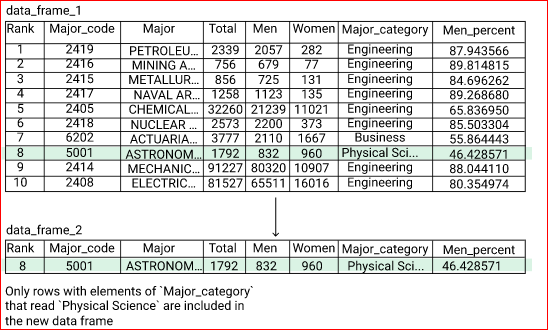

To filter our data frame by elements of variables that consist of character data, we'll only be using the `==` comparison operator:

`data_frame_2 <- data_frame_1 %>% filter(Major_category == "Physical Science")`

Remember to use quotation marks around the character data we're specifying.

**Task**

* Filter the `recent_grads_select` data frame to create a new data frame called `recent_grads_health` that contains only data on majors in the `Health` field (`the Major_category` variable).

* Filter the `recent_grads_select` data frame to create a new data frame called `recent_grads_money` that contains only data on majors where recent graduates' median (the `Median` variable) salary is greater than 70,000 USD.

**Answer**

`recent_grads_health <- recent_grads_select %>% filter(Major_category == "Health")`

`recent_grads_money <- recent_grads_select %>% filter(Median > 70000)`

Filtering by individual criteria can be effective. However, we have several criteria we want our selected majors to meet. We can also use the `filter()` function to retain rows of a data frame that fit multiple criteria.

What if we wanted to create a new data frame containing college majors that met **either** of the following criteria:

* Majors in the Engineering catagory (Major_category == "Engineering")
* Majors with over 1,000 total graduates (Total > 1000)

In the example above, all college majors in `data_frame_1` meet at least one of the criteria we specified. We can think of the criteria we want our college majors to meet as being described by the following statement:

"Majors that are either in the engineering category **or** have over 1,000 graduates"

When we write code to specify that we are filtering for rows of our data frame that meet these criteria, we will use an operator to denote the **or** in the statement above: **`|`**. When we are filtering by multiple criteria, the `|` operator specifies we want to retain rows of our data frame that meet **at least one of** the criteria we specify.

To use filter() to create a new data frame containing college majors that are either in the engineering category or have more than 1,000 total graduates, we would write:

`data_frame_2 <- data_frame_1 %>% filter(Major_category == "Engineering" | Total > 1000)`

As we work on identifying possible college majors, we need to filter our data frame to select majors that meet our criteria for being in the science categories. Let's use the `filter()` function to create a new data frame that contains only college majors in the Biology & Life Science and Physical Sciences categories.

**Task**

Create a new data frame that contains only data on college majors that are either in the `Biology & Life Science` OR `Physical Sciences` categories (`Major_category`). Name the new data frame `recent_grads_science`.

**Answer**

`recent_grads_science <- recent_grads_select %>% filter(Major_category == "Biology & Life Science" | Major_category == "Physical Sciences")`

Now we'll filter that data frame, `recent_grads_science`, to retain only college majors that meet our remaining two criteria:

* Recent graduates must have a median salary above 40,000 USD
* More than 40 percent of graduates must be women

We'll use `filter()` and write an expression that will allow us to specify our two criteria. However, in this case, we'll want the college majors to retain in a new data frame to meet **both** the criteria rather than at least one of them.

For example, we may want to filter `data_frame_1` to retain only college majors that meet both of the following criteria:

* Majors in the Engineering catagory (`Major_category == "Engineering"`)
* Majors with over 1,000 total graduates (`Total > 1000`)

To include both expressions in the `filter()` function, we will introduce another operator: `&`

The `&` operator specifies that **both** criteria in an expression must be met.

To use `filter()` to create a new data frame containing only engineering college majors with more than 1,000 total graduates, we'd write:

`data_frame_2 <- data_frame_1 %>% 
    filter(Major_category == "Engineering" & Total > 1000)`
    
Let's create a new data frame containing only college majors that meet all three of our criteria for college majors. To accomplish this, we'll use `filter()` and the `&` operator to filter rows in the recent_grads_science data frame to retain only majors that have women as greater than 40 percent of total graduates and median salaries above 40,000 USD.

**Task**

* Filter the recent_grads_science data frame to create a new data frame containing only data on college majors meeting both the following criteria:

 * Median >= 40000
 * Women_percent > 40
 
* Name the new data frame potential_majors.

**Answer**

`potential_majors <- recent_grads_science %>%
  filter(Women_percent > 40 & Median >= 40000)`

We now have a data frame, potential_majors, containing data for seven college majors that fit our criteria:

* Physical and life sciences
* Recent graduates must have a median salary above 40,000 USD
* More than 40 percent of graduates must be women

The full names of the majors, which are abbreviated in the data frame printout to save space, are:

* ASTRONOMY AND ASTROPHYSICS
* NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL TECHNOLOGIES
* PHARMACOLOGY
* OCEANOGRAPHY
* COGNITIVE SCIENCE AND BIOPSYCHOLOGY
* MOLECULAR BIOLOGY
* GENETICS

These are all good options, but we want to refine our list of college majors further. We've heard from friends who recently graduated college that some of them are struggling to find jobs. To maximize our chances of finding employment after graduation, let's investigate the `Unemployment_rate` variable in.

`Unemployment_rate` is calculated by dividing the total number of unemployed graduates by the total number of graduates. Values range from zero to one.

Let's arrange our data frame in order of **ascending** unemployment rate. We'll want entire rows of the data frame arranged in order of unemployment rate, from lowest to highest.

To arrange our data frame rows by Unemployment_rate, we'll use another function in the `dplyr` package: `arrange()`.

The `arrange()` function lets us specify a variable we want to use to re-order the rows of our data frame. Let's say we want to arrange `data_frame_1` by `Total`:

`data_frame_2 <- data_frame_1 %>% arrange(Total)`

By default, `arrange()` orders the rows of a data frame by the specified variable in `ascending` order, from lowest to highest.

We can also use `arrange()` to order rows of a data frame by a variable in **descending** instead of ascending order; that is, from largest to smallest. To specify that we want to arrange rows by a variable in descending order, we can surround variables with `desc()`, short for "descending".

For example, if we want to re-order data_frame_1 in order of Total from largest to smallest, we can write:

`data_frame_2 <- data_frame_1 %>% arrange(desc(Total))`

We can arrange data frames by multiple numeric variables as well. If we specify multiple variables, R will reorder rows of the data frame by each variable in order, moving from left to right.

To arrange `data_frame_1` in order of ascending `Total` and descending `Men_percent`, we could write:

`data_frame_2 <- data_frame_1 %>% arrange(Total, desc(Men_percent))`

Let's arrange the `potential_majors` data frame so that majors with the lowest unemployment rates and the highest median salaries are at the top.

**Task**

Create a new data frame, `my_majors`, containing the data in the `potential_majors` data frame arranged in order of increasing `Unemployment_rate` and decreasing `Median` (in that order).

**Answer**

`my_majors <- potential_majors %>%  arrange(Unemployment_rate, desc(Median))`

We completed a typical data analysis workflow: Importing data into R, investigating it, simplifying our data frame, and performing some analysis.

We've created a new data frame that contains data on seven college majors that suit our criteria, and arranged the majors for maximizing median salary and minimizing unemployment rates of recent graduates:

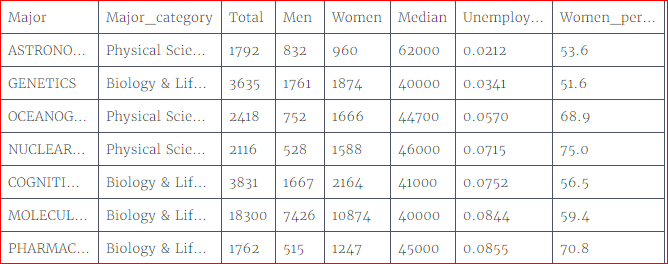

Based on our analysis, our top three choices for college majors are:

* ASTRONOMY AND ASTROPHYSICS
* GENETICS
* OCEANOGRAPHY